# MNIST 資料集
* 深度學習 DL: Deep Learning
* 全連接層 FCL: Fully Connected Layer
* 多層神經網路 MLP: Multi-layer Perceptron
```python
import keras
from keras.models import Sequential # 建立MLP
from keras.layers import Dense # MLP套用Dense
from keras.utils.np_utils import to_categorical # 把答案變成one-hot encoding
from sklearn.metrics import confusion_matrix # 運用confusion_matrix查看預測分佈
```

In [1]:
import keras
''' MAC 還要加兩行'''
import ssl
ssl._create_default_https_context=ssl._create_unverified_context
''' MAC'''

Using TensorFlow backend.
/Users/lenotsai/Desktop/0912_機器深度學習/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/lenotsai/Desktop/0912_機器深度學習/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/lenotsai/Desktop/0912_機器深度學習/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/U

' MAC'

In [2]:
from keras.datasets.mnist import load_data
# load_data()
# ((訓練圖片,訓練答案),(測試圖片,測試答案))

In [3]:
# ((訓練題目，訓練答案),(測試題目，測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


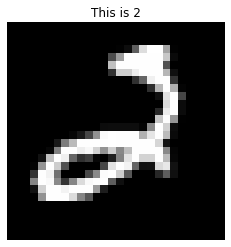

In [5]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0,59999)
plt.title("This is " + str(y_train[c]))
plt.axis("off")
plt.imshow(x_train[c], cmap="gray")

In [14]:
import pandas as pd
pd.DataFrame(x_train[c])

/Users/lenotsai/Desktop/0912_機器深度學習/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [6]:
# input & weight 要相輔相成
# keras & tensorflow 預設輸入為 -1 to 1
# 圖片調整: /255 -> tensorflow weights, reshape -> MLP只吃一維
x_train_reshape = x_train.reshape(60000,784)/255
x_test_reshape = x_test.reshape(10000,784)/255

In [7]:
# 答案調整: One-hot encoding
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("Before: ", y_train[0])
print("After: ", y_train_cat[0])

Before:  5
After:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
mlp.add(Dense(256, activation="relu", input_dim=784))
# 每個激活函數都會搭配一個bias，把激活點調整回0
# 784*256 weights + 256 bias = 200960 parameters
mlp.add(Dense(10, activation="softmax"))
# 256*10 weights + 10 bias = 2570 parameters
mlp.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 確定訓練模型的訓練方式...等
# 隨機(隨便選一組weight)梯度(正確方向)下降
# 最後輸出一個神經元：Activation = Sigmoid；Loss = binary_crossentropy(二元交叉熵)
# 最後輸出多個神經元：Activation = Softmax；Loss: categorical_crossentropy(多元交叉熵)
# MSE mean-square error變動太小，不適合用在輸出0~1之間的Loss函數，所以改用entropy
# Optimizer: 下降的時候優化 -> 基於動量(我在走的時候不是等速度，而是有速度的累積)
mlp.compile(loss="categorical_crossentropy", 
            optimizer="adam",
            metrics=["accuracy"])

* batch_size: 看幾筆資料(200)才做一次調整(梯度下降)
* 資料不大(這裡是28x28)：batch_size = 100~200；資料很大：batch_size = 10~20
* epochs: 整份資料(考古題)翻幾次(10)，控制擬合程度
* 10個epochs, 200 batch: 54000訓練資料*10/batch 200 -> 訓練時調整了2700次
* val_loss開始平滑的時候，訓練就可以停止了
* validation_split：驗證模型好不好，要用沒看過的資料
* verbose=0 -> 完全不印；log  1->印出最仔細的；log 2->只印出validation
* 我們只看val_loss的改變，它可以看出預測與實際資料的距離
* 看val_acc會有落差，因為val_acc是二分法，依照“預測與實際資料的距離”直接分為對或錯，因此沒辦法看出模型準確率的些微差距

In [11]:
mlp.fit(x_train_reshape,
        y_train_cat,
        batch_size=200,
        epochs=10,
        validation_split=0.1, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 2s - loss: 0.0203 - acc: 0.9955 - val_loss: 0.0689 - val_acc: 0.9800
Epoch 2/10
 - 2s - loss: 0.0171 - acc: 0.9963 - val_loss: 0.0719 - val_acc: 0.9800
Epoch 3/10
 - 2s - loss: 0.0141 - acc: 0.9974 - val_loss: 0.0658 - val_acc: 0.9818
Epoch 4/10
 - 2s - loss: 0.0115 - acc: 0.9980 - val_loss: 0.0629 - val_acc: 0.9830
Epoch 5/10
 - 2s - loss: 0.0096 - acc: 0.9987 - val_loss: 0.0649 - val_acc: 0.9830
Epoch 6/10
 - 2s - loss: 0.0083 - acc: 0.9989 - val_loss: 0.0670 - val_acc: 0.9813
Epoch 7/10
 - 2s - loss: 0.0065 - acc: 0.9992 - val_loss: 0.0729 - val_acc: 0.9810
Epoch 8/10
 - 2s - loss: 0.0054 - acc: 0.9996 - val_loss: 0.0664 - val_acc: 0.9830
Epoch 9/10
 - 2s - loss: 0.0046 - acc: 0.9995 - val_loss: 0.0679 - val_acc: 0.9820
Epoch 10/10
 - 2s - loss: 0.0034 - acc: 0.9999 - val_loss: 0.0672 - val_acc: 0.9827


In [12]:
mlp.evaluate(x_test_reshape, y_test_cat)
# 結果 [val_loss, val_acc]

10000/10000 [==============================] - 0s 44us/step


[0.06766799473744904, 0.9807]

In [15]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pre = mlp.predict_classes(x_test_reshape)
pre
label = list(range(0,10))
c = [(str(l) + " (預測)") for l in label]
i = [(str(l) + " (正確)") for l in label]
pd.DataFrame(confusion_matrix(y_test, pre),
            columns=c, index = i)

,0 (預測),1 (預測),2 (預測),3 (預測),4 (預測),5 (預測),6 (預測),7 (預測),8 (預測),9 (預測)
0 (正確),971,0,1,0,1,0,3,1,3,0
1 (正確),0,1123,4,0,0,1,2,1,4,0
2 (正確),6,2,1006,3,1,0,2,5,6,1
3 (正確),1,0,2,996,0,3,0,4,3,1
4 (正確),2,0,3,0,966,1,3,1,0,6
5 (正確),2,0,0,10,1,872,2,1,3,1
6 (正確),4,3,2,1,3,3,942,0,0,0
7 (正確),1,4,7,1,1,0,0,1007,2,5
8 (正確),3,0,2,4,6,6,2,4,943,4
9 (正確),2,2,0,5,7,6,0,5,1,981


In [16]:
pre != y_test

array([False, False, False, ..., False, False, False])

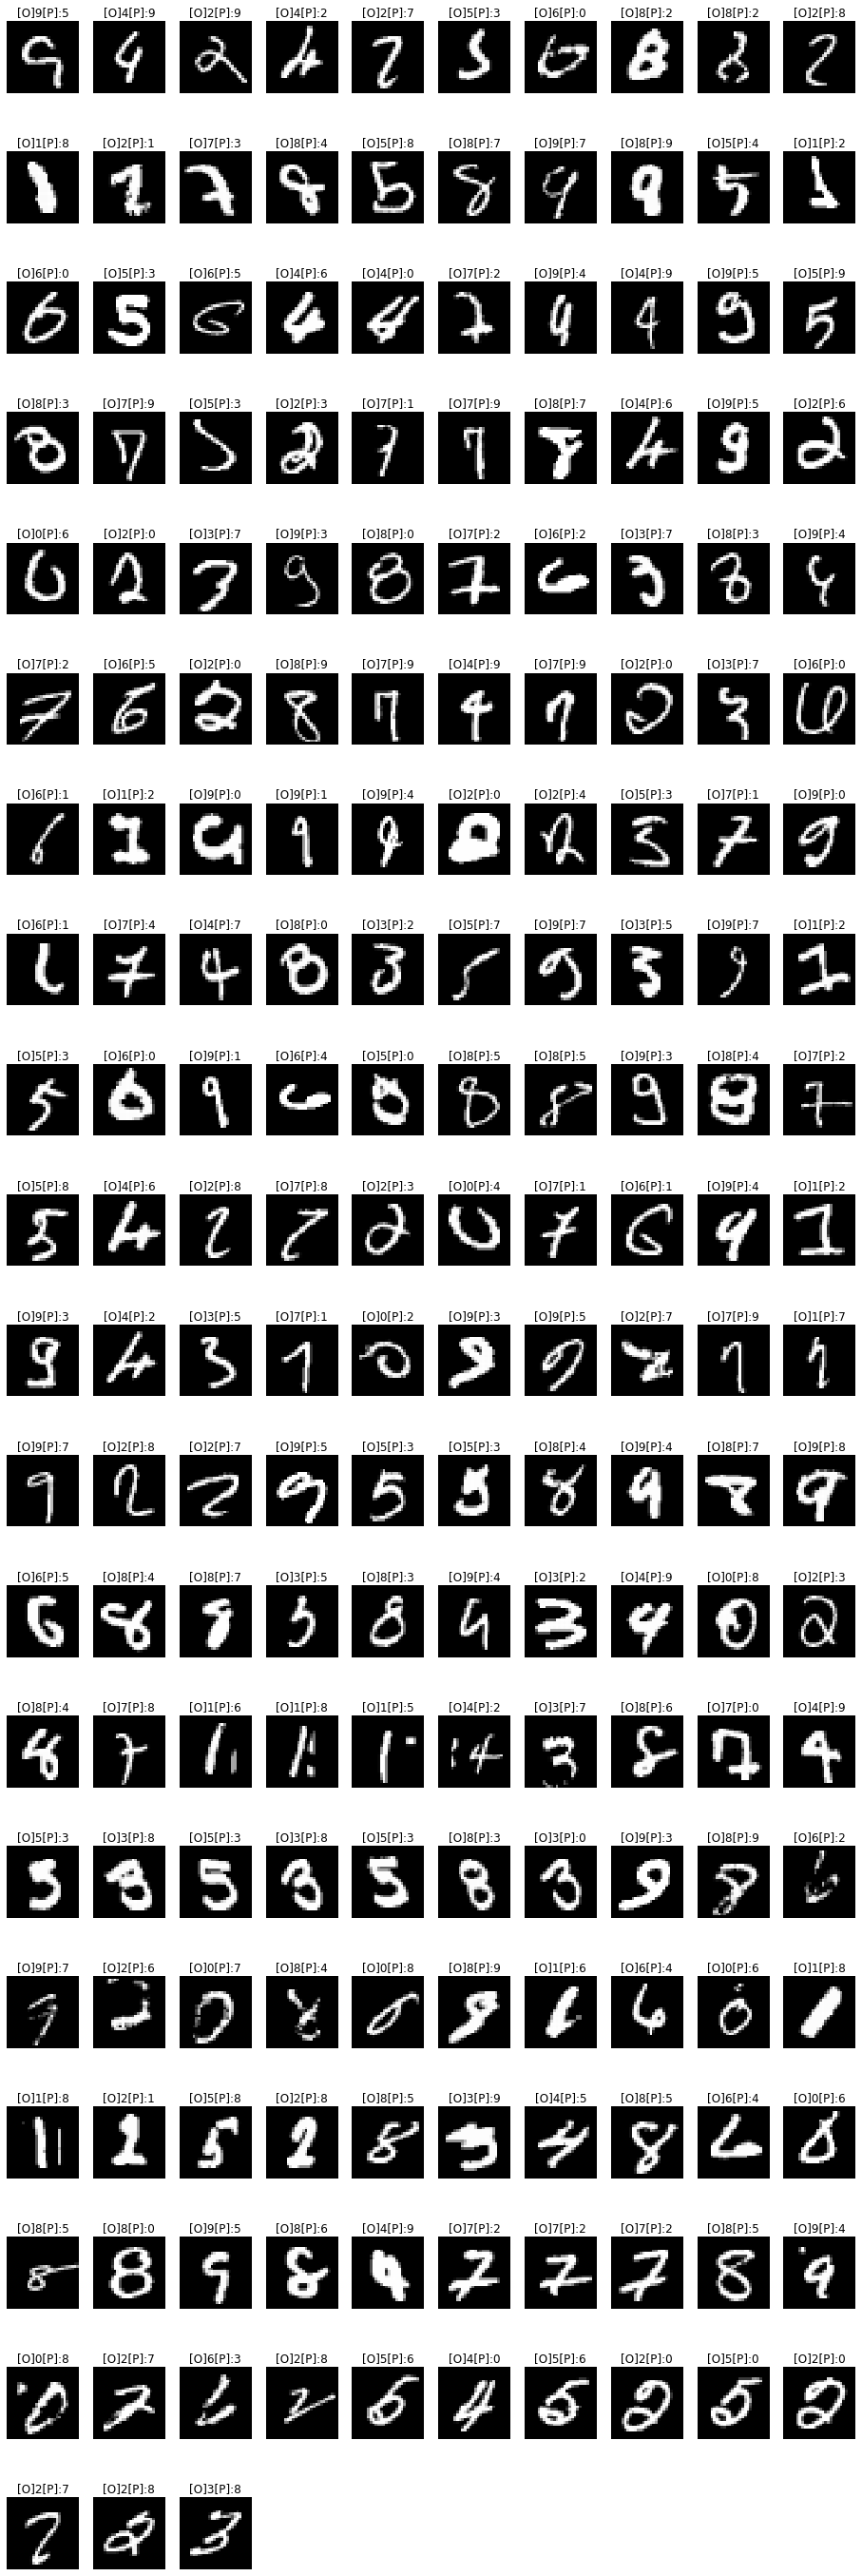

In [17]:
# pre & y_test 都是numpy陣列，才能直接做數字比較
# 找出矩陣中預測錯誤的位置
import numpy as np
# list: list[一個數字]
# numpy array: nparray[[多個數字]]

# pre & y_test兩邊不等處在array中的位置
idx = np.nonzero(pre != y_test)[0]

# 預測錯誤的圖的原本標籤
original_answer = y_test[idx]

# 預測錯誤的圖的預測標籤
predict_answer = pre[idx]

# 把圖拿出來
imgfalse = x_test[idx]

# matplotlib

plt.figure(figsize=(16,50))
# 每一列就是10個
width = 10
height = int(len(imgfalse)/10)+1
for (i,img) in enumerate(imgfalse):
    # (列數、行數、第幾張圖(i開始))
    plt.subplot(height,width, i+1)
    plt.axis("off")
    t = "[O]" + str(original_answer[i]) + "[P]:" + str(predict_answer[i])
#     print(t)
    plt.title(t)
    plt.imshow(img, cmap="gray")

In [37]:
print(len(original_answer))
print(type(original_answer))

def check_pre_num(original_answer_list, predict_answer_list,ori:int, pre:int)->int:
    count = 0
    zzip = zip(original_answer_list,predict_answer_list)
    for i in zzip:
        if i[0] == ori and i[1] == pre:
            count += 1
    print('把',ori,'預測成',pre,'，有',count,'個')
#     return count

# count = check_pre_num(original_answer, predict_answer,7,2)
# print('把7預測成2有幾個？',count)
check_pre_num(original_answer, predict_answer,7,2)
check_pre_num(original_answer, predict_answer,2,7)
check_pre_num(original_answer, predict_answer,8,5)

193
<class 'numpy.ndarray'>
把 7 預測成 2 ，有 7 個
把 2 預測成 7 ，有 5 個
把 8 預測成 5 ，有 6 個


In [21]:
original_answer

array([9, 4, 2, 4, 2, 5, 6, 8, 8, 2, 1, 2, 7, 8, 5, 8, 9, 8, 5, 1, 6, 5,
       6, 4, 4, 7, 9, 4, 9, 5, 8, 7, 5, 2, 7, 7, 8, 4, 9, 2, 0, 2, 3, 9,
       8, 7, 6, 3, 8, 9, 7, 6, 2, 8, 7, 4, 7, 2, 3, 6, 6, 1, 9, 9, 9, 2,
       2, 5, 7, 9, 6, 7, 4, 8, 3, 5, 9, 3, 9, 1, 5, 6, 9, 6, 5, 8, 8, 9,
       8, 7, 5, 4, 2, 7, 2, 0, 7, 6, 9, 1, 9, 4, 3, 7, 0, 9, 9, 2, 7, 1,
       9, 2, 2, 9, 5, 5, 8, 9, 8, 9, 6, 8, 8, 3, 8, 9, 3, 4, 0, 2, 8, 7,
       1, 1, 1, 4, 3, 8, 7, 4, 5, 3, 5, 3, 5, 8, 3, 9, 8, 6, 9, 2, 0, 8,
       0, 8, 1, 6, 0, 1, 1, 2, 5, 2, 8, 3, 4, 8, 6, 0, 8, 8, 9, 8, 4, 7,
       7, 7, 8, 9, 0, 2, 6, 2, 5, 4, 5, 2, 5, 2, 2, 2, 3], dtype=uint8)

In [36]:
from keras.preprocessing.image import load_img
fp = input("請輸入你要檢測的圖：")
# img 為pillow_img, RGB
# 轉為 np.array，convert為灰階
img = load_img(fp, target_size=(28,28)).convert("L")
img_np = np.array(img)
img_np_norm = img_np / 255
img_np_norm = img_np_norm.reshape(1,784)
print("應該是：",mlp.predict_classes(img_np_norm)[0])
plt.imshow(img_np, cmap="gray")

KeyboardInterrupt: 